# Ensayo SVM
## Nombre: Victor Rene Pérez Mayen
## Carnet: 19005180


In [3]:
import tensorflow as tf, numpy as np, matplotlib.pyplot as plt, pandas as pd, sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.externals import joblib
from scipy import stats
from sklearn.externals.six import StringIO

### Hipótesis de SVM

##### Referencia: https://www.youtube.com/watch?v=VWwb3IAB6Rc&feature=youtu.be

**Support Vector Machine es un algorítmo de ML sirve para separar dos categorias. Se selecciona la mejor recta y a esta la llamaremos recta de separación. Para seleccionar el margen del algorítmo de primero se buscan los vectores que estén más cerca de recta de separación, recibiendo asi el nominativo de vectores de soporte.**

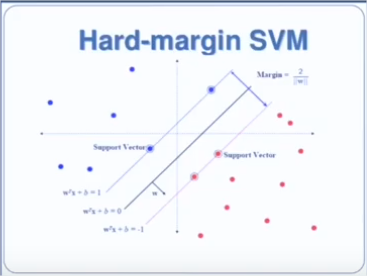

**SVM busca un hiperplano donde se tenga un margen lo más grande posible.**

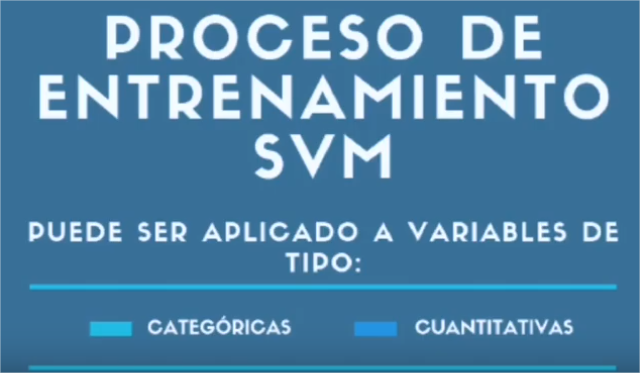

**SVM puede aplicarse a distintas variables, ya sea categóricas (incluidas las cualitativas) como cuantitativas. Su mayo aplicación es para la clasificación de texto. En caso de que se utilice con variables categóricas, se deberá realizar una conversión numérica utilizando one hot encoding; para las imágenes, se deberá de aplicar un reshape a estas y luego aplicar el algorítmo.**

***
### SVM
Construyendo la función para el modelo

In [38]:
def SVM(x_train, y_train, C, G):
    class_svm = svm.SVC(kernel = "rbf", gamma = G, C = C) # Gaussian Kernel
    class_svm = class_svm.fit(x_train, y_train)
    return class_svm

Hiperparametros:
* C
* Gamma

In [39]:
# Hiperparametro: C
C = np.arange(1,5, step = 0.5)
# Hiperparametro: Gamma
Gamma = np.arange(0.01, 0.1, step = 0.01)

* Se hace un modelo diferente por cada valor de C/Gamma y se guarda con el nombre indicado

In [40]:
# Lista para guardar todos los modelos
svm_models = []
# Lista para guardar las metricas de los modelos de entrenamiento
svm_train_metrics = []
# Lista para guardar las metricas de los datos de validación
svm_val_metrics = []

In [41]:
for C_value in C:
    for G_value in Gamma:
        name = "svm_c_"+str(C_value)+"_gamma_"+str(G_value)
        modelo = SVM(x_train, y_train, C_value, G_value)
        svm_models.append(modelo)
        joblib.dump(modelo, "./Modelos_SVM/"+name+".pkl")
        # Se obtienen las métricas de los modelos de entrenamiento
        svm_train_metrics.append(metricas(y_train, modelo.predict(x_train)))
        # Se obtienen las métricas de los datos de validación
        svm_val_metrics.append(metricas(y_val, modelo.predict(x_val)))

* Haciendo dataframes para guardar las métricas de cada experimento
    * Se usan dos archivos .csv diferentes (uno para almacenar las métricas del entrenamiento y otro para guardar las métricas de validación)

In [42]:
r_svm_train = pd.DataFrame(columns = ["C","Gamma","Accuracy","Error","Precision","Recall","F1_Score"])
r_svm_val = pd.DataFrame(columns = ["C","Gamma","Accuracy","Error","Precision","Recall","F1_Score"])

columna_C = []
columna_G = []
for num_C in C:
    for num_G in Gamma:
        columna_C.append(num_C)
        columna_G.append(num_G)


#Metricas Entrenamiento
for num, val in enumerate(svm_train_metrics):
    r_svm_train.loc[num] = [0, 0, val[0], val[1], val[2], val[3], val[4]]
        
r_svm_train["C"] = columna_C
r_svm_train["Gamma"] = columna_G

#Metricas Validación
for num, val in enumerate(svm_val_metrics):
    r_svm_val.loc[num] = [0, 0, val[0], val[1], val[2], val[3], val[4]]
        
r_svm_val["C"] = columna_C
r_svm_val["Gamma"] = columna_G

In [43]:
# Guardando el data frame de las métricas de entrenamiento
r_svm_train.to_csv("./Modelos_SVM/metricas_svm_train.csv", index = False)
r_svm_train.head(5)

,C,Gamma,Accuracy,Error,Precision,Recall,F1_Score
0,1.0,0.01,0.766257,0.233743,0.850877,0.766257,0.593272
1,1.0,0.02,0.808436,0.191564,0.876812,0.808436,0.689459
2,1.0,0.03,0.817223,0.182777,0.881119,0.817223,0.707865
3,1.0,0.04,0.822496,0.177504,0.905797,0.822496,0.712251
4,1.0,0.05,0.834798,0.165202,0.934307,0.834798,0.731429


In [44]:
# Guardando el data frame de las métricas de validacion
r_svm_val.to_csv("./Modelos_SVM/metricas_svm_val.csv", index = False)
r_svm_val.head(5)

,C,Gamma,Accuracy,Error,Precision,Recall,F1_Score
0,1.0,0.01,0.650350,0.349650,0.656250,0.650350,0.456522
1,1.0,0.02,0.643357,0.356643,0.609756,0.643357,0.495050
2,1.0,0.03,0.636364,0.363636,0.590909,0.636364,0.500000
3,1.0,0.04,0.622378,0.377622,0.568182,0.622378,0.480769
4,1.0,0.05,0.636364,0.363636,0.600000,0.636364,0.480000


#### Buscando el mejor modelo

In [45]:
best_svm = np.argmax(np.array(r_svm_train["Accuracy"]))
best_svm = r_svm_train.iloc[best_svm]
best_svm

C            4.500000
Gamma        0.090000
Accuracy     0.927944
Error        0.072056
Precision    0.947917
Recall       0.927944
F1_Score     0.898765
Name: 71, dtype: float64

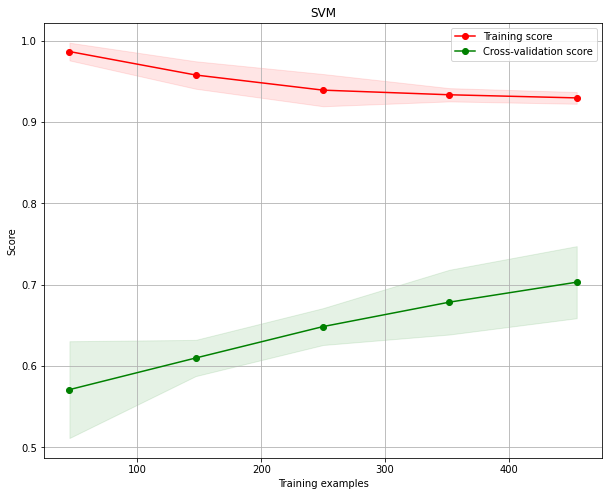

In [46]:
estimator = svm.SVC(kernel = "rbf", gamma = 0.09, C = 4.5)
skplt.estimators.plot_learning_curve(estimator, x_train, y_train, title = "SVM", scoring = "accuracy", cv=5, shuffle=True, random_state=42, n_jobs=-1, figsize=(10, 8),)